### Hurst Exponent and Variance Ratio Test

Intuitively speaking, a “stationary” price series means that the prices diffuse from its initial value more slowly than a geometric random walk would. Mathematically, we can determine the nature of the price series by measuring this speed of diffusion. The speed of diffusion can be characterized by the variance

$$
Var(τ) = 〈|z(t + τ) − z(t)|^2〉 \;\;\;\;\; (2.2)
$$

where $z$ is the log prices $(z = log( y))$, $τ$ is an arbitrary time lag, and$〈...〉$is an average over all $t$’s. For a geometric random walk, we know that

$$
〈|z(t + τ) − z(t)|^2〉 ∼ τ \;\;\;\;\; (2.3)
$$

The $∼$ means that this relationship turns into an equality with some proportionality constant for large $τ$, but it may deviate from a straight line for small $τ$. But if the $(log)$ price series is mean reverting or trending (i.e., has positive correlations between sequential price moves), Equation 2.3 won’t hold. Instead, we can write:

$$
〈|z(t + τ) − z(t)|^2〉 ∼ τ^{2H} \;\;\;\;\; (2.4)
$$

where we have defined the Hurst exponent H.

For a price series exhibiting geometric random walk, $H = 0.5$. But for a mean-reverting series, $H < 0.5$, and for a trending series, $H > 0.5$. As $H$ decreases toward zero, the price series is more mean reverting, and as $H$ increases toward 1, the price series is increasingly trending; thus, $H$ serves also as an indicator for the degree of mean reversion or trendiness.

$$
\begin{cases}
H < 0.5, \;\;\; stationary \\
H = 0.5, \;\;\; random \\
H > 0.5, \;\;\; trending \\
\end{cases}
$$

### Example 2.2: Computing the Hurst Exponent

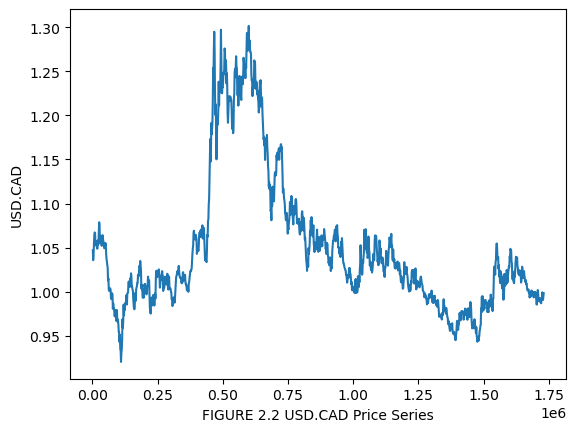

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df=pd.read_csv('inputData_USDCAD.csv')

y=df.loc[df['Time']==1659, 'Close']

plt.xlabel("FIGURE 2.2 USD.CAD Price Series")
plt.ylabel("USD.CAD")
plt.plot(y)

Using the same USD.CAD price series in the previous example, we now compute the Hurst exponent using a function called genhurst 

In [2]:
def genhurst(z):
# =============================================================================
# calculation of Hurst exponent given log price series z
# =============================================================================
    z=pd.DataFrame(z)
    
    taus=np.arange(np.round(len(z)/10)).astype(int) # We cannot use tau that is of same magnitude of time series length 
    logVar=np.empty(len(taus)) # log variance

    for tau in taus:
        logVar[tau]=np.log(z.diff(tau).var(ddof=0))
        
    X=np.log(taus)    
    Y=logVar[:len(taus)]
    X=X[np.isfinite(logVar)]
    Y=Y[np.isfinite(logVar)]
#    pd.DataFrame(np.asmatrix([X, Y]).T).to_csv('XY.csv')

    X = sm.add_constant(X)
    plt.scatter(X[:,1], Y) # for debug only
    model=sm.OLS(Y, X)
    results=model.fit()
    H=results.params[1]/2
    pVal=results.pvalues[1]
    return H, pVal

H=0.475844 pValue=0.000000


/Users/yusun/Developer/miniconda3/envs/lab/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/f0/dtf602t102nf_ydrzh1zz37m0000gn/T/ipykernel_38186/3705575431.py:13: RuntimeWarning: divide by zero encountered in log
  X=np.log(taus)


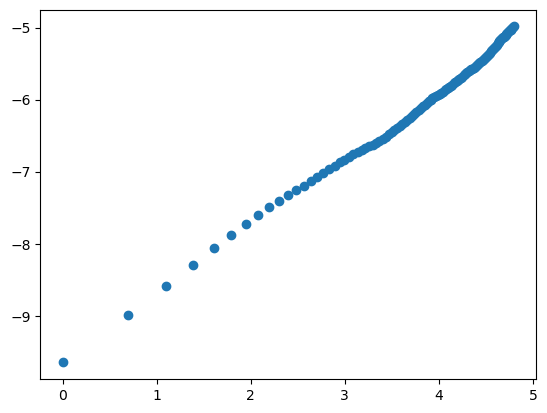

In [3]:
# Find Hurst exponent
H, pVal=genhurst(np.log(y))
print("H=%f pValue=%f" % (H, pVal))

In Example 2.2, we computed the Hurst exponent for the same currency rate series USD.CAD that we used in the previous section. It generates an H of 0.48, which suggests that the price series is weakly mean reverting.

Let's see Hurst exponent for stablecoin DAI/USD from Gemini exchange.

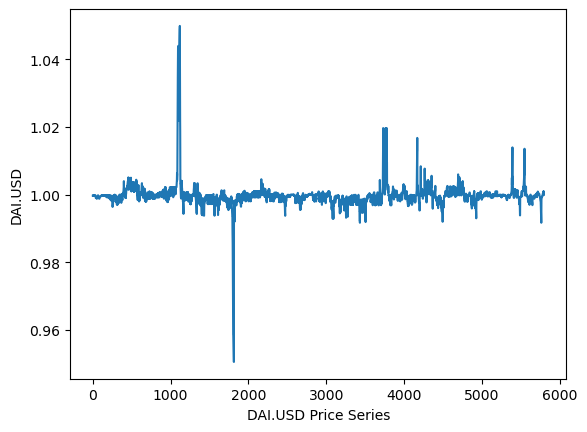

In [4]:
df2 = pd.read_hdf('inputData_DAIUSD.h5')

y2 = df2['price']

plt.xlabel("DAI.USD Price Series")
plt.ylabel("DAI.USD")
plt.plot(y2)

H=0.097658 pValue=0.000000


/Users/yusun/Developer/miniconda3/envs/lab/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/f0/dtf602t102nf_ydrzh1zz37m0000gn/T/ipykernel_38186/3705575431.py:13: RuntimeWarning: divide by zero encountered in log
  X=np.log(taus)


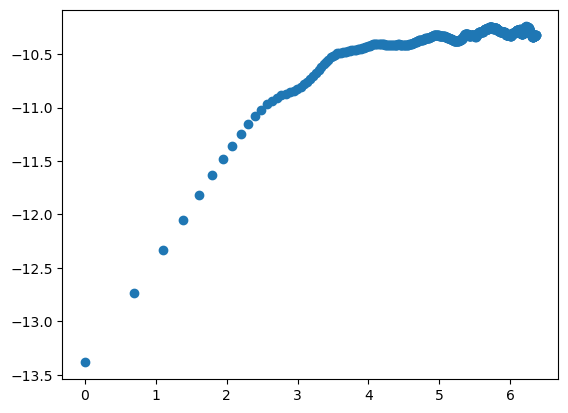

In [5]:
H, pVal=genhurst(np.log(y2))
print("H=%f pValue=%f" % (H, pVal))